<h1 align=center><font size = 5>Cars Purchase Decision</font></h1>

# Importing Library

In [1]:
# Import Library untuk mengolah data
import pandas as pd
import numpy as np
from sklearn import preprocessing

# Import Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Import Library untuk Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Import Library untuk evaluasi
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Import Dataset
Dataset yang digunakan bersumber dari kaggle datasets download -d gabrielsantello/cars-purchase-decision-dataset

In [2]:
# Import dataset
df = pd.read_csv("D:\data set\car_data.csv")

# Menampilkan data
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


# Data Exploration


In [3]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [4]:
# Menampilkan jumlah missing value pada masing masing kolom
print("Jumlah missing value pada masing masing kolom")
df.isnull().sum()

Jumlah missing value pada masing masing kolom


User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

Hasil data exploration di atas menunjukkan bahwa data yang akan digunakan terdiri dari 1000 baris data dimana masing masing variabel tidak terdapat *missing value*

## Data Visualization

[Text(0.5, 1.0, 'Jumlah Status Transaksi Berdasarkan Gender')]

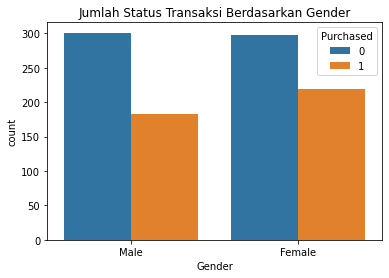

In [5]:
# Menampilkan distribusi status transaksi berdasarkan gender
sns.countplot(
    x      = 'Gender'
    , hue  = 'Purchased'
    , data = df
).set(title = 'Jumlah Status Transaksi Berdasarkan Gender')

Hasil visualisasi di atas menunjukkan bahwa distribusi data antara user laki laki dan perempuan relatif sama.

[Text(0.5, 1.0, 'Distribusi Status Transaksi Berdasarkan Gender dan Umur')]

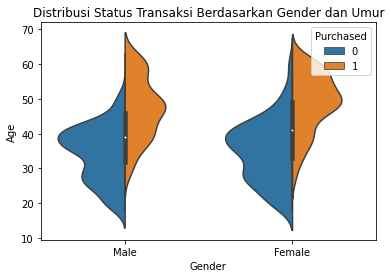

In [6]:
# Menampilkan distribusi status transaksi berdasarkan gender dan umur user

sns.violinplot(
    x = 'Gender'
    , y = 'Age'
    , hue = 'Purchased'
    , data = df
    , split = True
    , scale = 'count'
).set(title = 'Distribusi Status Transaksi Berdasarkan Gender dan Umur')

Hasil Violinplot diatas dapat ditarik kesimpulan adanya kecenderungan pembelian mobil tidak diselesaikan pada user laki laki dengan usia dibawah 45 Tahun dan perempuan usia dibawah 50 tahun. 

[Text(0.5, 1.0, 'Distribusi Status Transaksi Berdasarkan Gender dan Umur')]

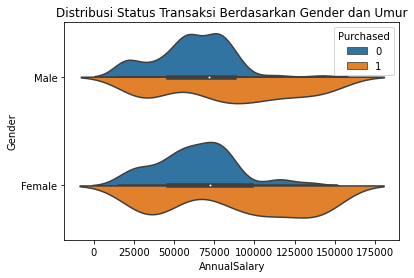

In [7]:
# Menampilkan distribusi status transaksi berdasarkan gender dan pendapatan pertahun

sns.violinplot(
    x = 'AnnualSalary'
    , y = 'Gender'
    , hue = 'Purchased'
    , data = df
    , split = True
    , scale = 'count'
).set(title = 'Distribusi Status Transaksi Berdasarkan Gender dan Umur')

Dari hasil violin plot di atas dapat ditarik kesimpulan bahwa ada kecenderungan transaksi gagal pada user yang memiliki pendapatan per tahun sebesar 50000 - 80000 baik pada user laki laki maupun perempuan

# Data Preparation

In [8]:
# Menghilangkan kolom yang tidak diperlukan
data = df.drop(['User ID'], axis=1)
data

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0
...,...,...,...,...
995,Male,38,59000,0
996,Female,47,23500,0
997,Female,28,138500,1
998,Female,48,134000,1


In [9]:
# Mengganti label gender kedalam bentuk numerik
data['Gender'] = np.where(data['Gender'] == 'Male', 1,0)

data

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0
...,...,...,...,...
995,1,38,59000,0
996,0,47,23500,0
997,0,28,138500,1
998,0,48,134000,1


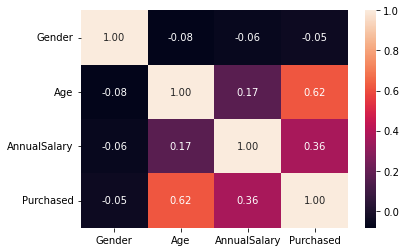

In [10]:
# Menampilkan korelasi antar variabel
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

Berdasarkan visualisasi heatmap berdasarkan nilai korelasi diatas menunjukkan bahwa tidak terdapat hubungan yang kuat antara masing masing features sehingga tidak diperlukan eliminasi features. Nilai koefisien korelasi antara age dan purchased status serta annual salary dan purchased status menunjukkan adanya hubungan positif antara features dengan label yang dapat menjadi dasar untuk melakukan classification.

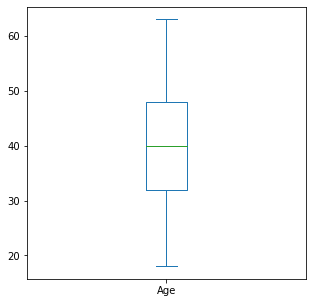

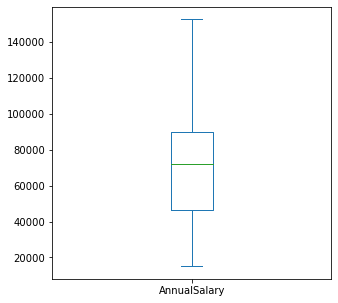

In [11]:
data[['Age']].plot(kind="box", figsize=(5, 5))
data[['AnnualSalary']].plot(kind="box", figsize=(5, 5))
plt.show()

Hasil box plot diatas menunjukkan bahwa tidak terdapat outlier pada feature age dan annual salary. Sehingga kita dapat langsung melakukan modeling dengan menggunakan dataset tersebut.

## Splitting dataset
Karena jumlah data yang tersedia pada dataset hanya sedikit, yaitu 1000 baris data saja, maka pembagian data yang akan dijadikan sebagai data training dan data testing adalah 90 : 10.

Kolom yang akan menjadi label / target adalah kolom 'Purchased'. Sedangkan kolom yang akan menjadi variabel / features adalah 'Gender', 'Age', 'AnnualSalary'

In [12]:
# Membagi data kedalam label dan features
y = data['Purchased']
X = data[['Gender', 'Age', 'AnnualSalary']]

In [13]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, stratify=y, random_state=42)

print(f"training size: {X_train.shape[0]} ({100*X_train.shape[0] / X.shape[0]:.3f}%)")
print(f"test size: {X_test.shape[0]} ({100*X_test.shape[0] / X.shape[0]:.3f}%)")

training size: 900 (90.000%)
test size: 100 (10.000%)


# Modeling
Modeling yang akan digunakan adalah classification transaction. Tujuannya untuk mengetahui karakteristik transaksi yang berpotensi untuk selesai (1) atau gagal (0). Pada tahap modeling ini akan digunakan 3 metode classification yaitu *decision tree classifier*, *random forest classifier*, dan *gradient boosting classifier* kemudian akan ditentukan mana model yang memberikan hasil terbaik.

## Decision Tree Classifier

In [14]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [15]:
preds_train_tree = tree.predict(X_train)
preds_test_tree = tree.predict(X_test)

In [16]:
# Menampilkan akurasi model
print ("Accuracy Training : ", accuracy_score(y_train, preds_train_tree))
print ("Accuracy test : ", accuracy_score(y_test, preds_test_tree))

Accuracy Training :  0.9955555555555555
Accuracy test :  0.91


## Random Forest Classifier

In [17]:
forest = RandomForestClassifier(n_estimators=100, random_state=5)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [18]:
preds_train_forest = forest.predict(X_train)
preds_test_forest = forest.predict(X_test)

In [19]:
print ("Accuracy Training : ", accuracy_score(y_train, preds_train_forest))
print ("Accuracy test : ", accuracy_score(y_test, preds_test_forest))

Accuracy Training :  0.9955555555555555
Accuracy test :  0.91


Hasil yang diberikan pada modeling decision tree classifier dan random forest classifier menunjukkan hasil accuracy training lebih dari 99%. Kondisi tersebut menurut Andreas C. Müller and Sarah Guido pada Introduction to Machine Learning with Python (2017), merupakan kondisi overly optimistic pada model yang merupakan kondisi overfitting. Sehingga kita akan mencoba menggunakan modeling *gradient boosting classifier* sebagai alternatif.

## Gradient Boosting Classifier

In [20]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [21]:
preds_train_gbrt = gbrt.predict(X_train)
preds_test_gbrt = gbrt.predict(X_test)

In [22]:
print ("Accuracy Training : ", accuracy_score(y_train, preds_train_gbrt))
print ("Accuracy test : ", accuracy_score(y_test, preds_test_gbrt))

Accuracy Training :  0.9388888888888889
Accuracy test :  0.92


Hasil accuracy pada modeling menggunakan *gradient boosting classifier* menunjukkan hasil yang lebih baik dibandingkan dengan *decision tree classifier* dan *random forest classifier*. Hasil accuracy training menunjukkan hasil 93.8% dan hasil acuracy test menunjukkan hasil 92%. Sehingga kita akan melanjutkan tahapan evaluasi model berdasarkan hasil modeling menggunakan *gradient boosting classifier*

# Evaluation
Untuk mengevaluasi performa model yang telah dibuat maka akan digunakan *confussion matrix* untuk mengetahui bagaimana performa darii model *decision tree* yang telah dibuat

Default model performance on training set..
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       538
           1       0.92      0.93      0.92       362

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



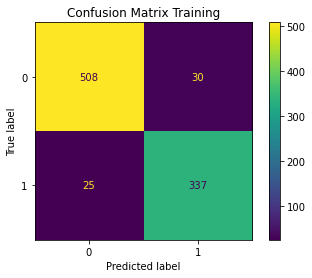

In [23]:
print("Default model performance on training set..")
print(classification_report(y_train, preds_train_gbrt))

# Visualisasikan Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_train, preds_train_gbrt)
plt.title("Confusion Matrix Training")
plt.grid(False)
plt.show()

Hasil dari evaluation metrics training menggunakan *gradient boosting classifier* di atas menunjukkan hasil yang bagus pada nilai  accuracy, precision, recall, dan f1-score. Hasil training model menunjukkan bahwa model mampu memprediksi 508 data berlabel gagal (0), 337 data berlabel selesai (1) dan model gagal memprediksi 25 data false negative dan gagal memprediksi 30 data false positive.

Default model performance on test set...
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        60
           1       0.92      0.88      0.90        40

    accuracy                           0.92       100
   macro avg       0.92      0.91      0.92       100
weighted avg       0.92      0.92      0.92       100



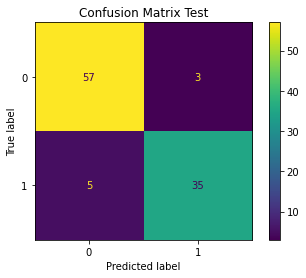

In [24]:
print("Default model performance on test set...")
print(classification_report(y_test, preds_test_gbrt))

# Visualisasikan Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, preds_test_gbrt)
plt.title("Confusion Matrix Test")
plt.grid(False)
plt.show()

Hasil dari evaluation metrics testing menggunakan *gradient boosting classifier* di atas menunjukkan hasil yang bagus pada nilai accuracy, precision, recall, dan f1-score. Hasil training model menunjukkan bahwa model mampu memprediksi 57 data berlabel gagal (0), 35 data berlabel selesai (1) dan model hanya gagal memprediksi 5 data false negative dan 3 data false positive

[Text(0.5, 1.0, 'Feature Importances')]

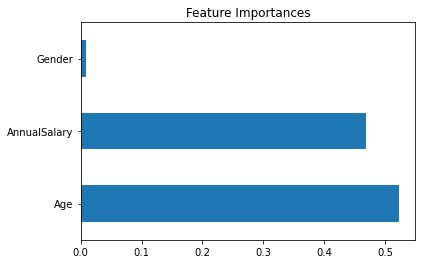

In [25]:
# Menampilkan importance features value
(pd.Series(gbrt.feature_importances_, index=X.columns)
   .nlargest(3)
   .plot(kind='barh')
   .set(title='Feature Importances') )

In [26]:
# Menmpilkan nilai feature imprtance
pd.Series(gbrt.feature_importances_, index=X.columns)

Gender          0.008589
Age             0.523350
AnnualSalary    0.468061
dtype: float64

Hasil importance feature diatas menunjukkan bahwa feature Age menjadi feature yang paling berpengaruh pada model yang dibuat sebesar 52.3% di susul oleh feature annual salary yang memberikan pengaruh 46.8%. Sedangkan feature gender hanya memberikan pengaruh sebesar 0.8% saja terhadap model yang dibuat.

## Implementation
Kita akan menguji coba model untuk memprediksi apakah transaksi pada kasus dibawah akan selesai atau tidak. Kasus yang akan diprediksi adalah :
1. Pembeli seorang perempuan berumur 40 tahun dengan pendapatan pertahun $97000

2. Pembeli seorang laki laki berumur 31 tahun dengan pendapatan pertahun $84000

In [27]:
predic = [[0, 40, 97000], [1, 35, 82000]]

data_predic = pd.DataFrame(predic, columns=['Gender', 'Age', 'AnnualSalary'])

data_predic

,Gender,Age,AnnualSalary
0,0,40,97000
1,1,35,82000


In [28]:
status = gbrt.predict(data_predic).tolist()
status

[1, 0]

Hasil prediksi menggunakan model *gradient boosting classifier* menghasilkan keputusan bahwa transaksi kasus pertama berpotensi untuk selesai atau customer akan menyelesaikan pembelian mobil. Sedangkan pada kasus transaksi kedua customer berpotensi tidak menyelesaikan pembelian mobilnya.